<a href="https://colab.research.google.com/github/luismiguelcasadodiaz/IBM_SkillsBuild_IA_325/blob/main/plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotly y Cufflinks

In [91]:
#!pip install plotly==4.14.0 cufflinks==0.17.3
!pip install --upgrade cufflinks plotly

In [92]:
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline
print(f"Cufflinks version: {cf.__version__}")
print(f"Plotly version: {plotly.__version__}")

Cufflinks version: 0.17.3
Plotly version: 6.1.1


### from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

+ **What it does:** This line imports specific functions from the plotly.offline module.

  + download_plotlyjs(): Downloads the Plotly.js library, which is necessary for rendering Plotly plots offline (without an internet connection).
  + init_notebook_mode(connected=True): Initializes Plotly to work within a Jupyter Notebook environment. The connected=True argument means that Plotly will link to an online CDN (Content Delivery Network) for its JavaScript libraries. If you set it to connected=False, it will rely on a local installation of Plotly.js (which might require running download_plotlyjs() first).
  + plot(): Used to **save** Plotly figures as standalone **HTML files**.
  + iplot(): Used to **display** Plotly **figures directly within** a Jupyter Notebook output **cell**.
+ **Why it's used:** This setup is crucial for using Plotly effectively in a Jupyter Notebook. init_notebook_mode() ensures that the interactive Plotly plots are rendered correctly within the notebook. iplot() is the primary function for displaying these interactive visualizations.

### cf.go_offline()

+ **What it does:** This line tells Cufflinks to work in offline mode.
+ **Why it's used:** Similar to Plotly's offline mode, this ensures that Cufflinks can generate Plotly figures **without requiring an internet connection**. It likely uses the Plotly.js library that was set up in the previous step.

### %matplotlib inline

+ **What it does:** This is a "magic command" specific to IPython (the kernel underlying Jupyter Notebook).
+ **Why it's used:** %matplotlib inline configures Matplotlib to display its plots directly within the output cells of the Jupyter Notebook. Without this command, Matplotlib plots might appear in separate windows. This is very convenient for viewing visualizations alongside your code.

In [93]:
# preparo 4 series de datos aleatorios
df = pd.DataFrame(np.random.randint(-250,250,size=(100,4)),columns='A B C D'.split())
df.head()

,A,B,C,D
0,206,-248,82,-72
1,-88,-247,-215,82
2,-51,50,116,-123
3,-87,-72,-184,-162
4,-62,68,-32,51


<Axes: >

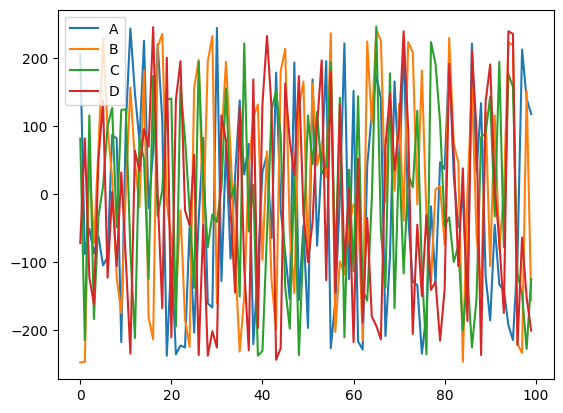

In [94]:
# clasico gráfico estático
df.plot()

In [95]:
# clásico grafico interactivo con iplot()
fig = go.Figure()

# Add traces for each column
fig.add_trace(go.Scatter(y=df['A'], name='A', line=dict(color='blue')))
fig.add_trace(go.Scatter(y=df['B'], name='B', line=dict(color='red')))
fig.add_trace(go.Scatter(y=df['C'], name='C', line=dict(color='green')))
fig.add_trace(go.Scatter(y=df['D'], name='D', line=dict(color='purple')))

iplot(fig)

In [96]:
fig = go.Figure()
# Add traces for each column
fig.add_trace(go.Scatter(x=df['A'], y=df['B'], mode='markers', name='A vs B', line=dict(color='blue')))
iplot(fig)

In [97]:
fig = go.Figure(data=[go.Bar(x=df['A'], y=df['B'])])
iplot(fig)

In [98]:
suma = df.sum()
fig = go.Figure(data=[go.Bar(x=suma.index, y=suma.values)])

iplot(fig)

In [99]:
fig = go.Figure()
for column in df.columns:
  fig.add_trace(go.Box(y=df[column], name=column))

iplot(fig)

In [100]:
fig = go.Figure(data=[go.Histogram(x=df['A'])])

iplot(fig)

In [101]:
fig = go.Figure()
for column in df.columns:
  fig.add_trace(go.Histogram(x=df[column], name=column))

iplot(fig)

In [103]:
#df[['A','B']].iplot(kind='spread')
# Pendiente de solucionar

EL error en el entorno no me deja generar esta imagen. tengo que aprender más



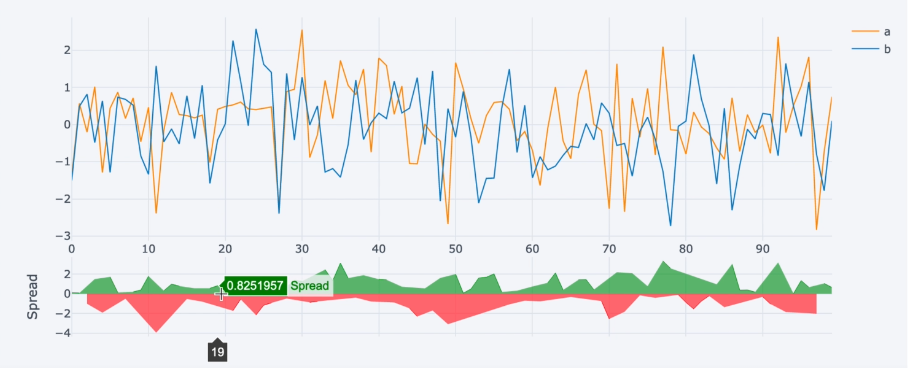

In [ ]:
#df.iplot(kind='bubble', x='A', y='B', size='C')
#pendiente de solucionar

In [ ]:
# Create the spread chart between Series A and B
fig = go.Figure()

# Scatter plot of Series A vs. Series B
fig.add_trace(go.Scatter(x=df['A'], y=df['B'], mode='markers', name='Data Points (A vs B)'))

# Add a line of equality for reference (y=x)
min_val = min(df['A'].min(), df['B'].min())
max_val = max(df['A'].max(), df['B'].max())
fig.add_trace(go.Scatter(x=[min_val, max_val], y=[min_val, max_val],
                         mode='lines', name='Line of Equality',
                         line=dict(color='gray', dash='dash')))

# Add annotations to highlight the spread (optional)
# Adjust the threshold based on your data's scale
for i in range(len(df)):
    spread = df['B'][i] - df['A'][i]
    if abs(spread) > 1:  # Example threshold
        fig.add_annotation(x=df['A'][i], y=df['B'][i],
                             text=f'{spread:.2f}',
                             showarrow=True,
                             arrowhead=1,
                             ax=20,
                             ay=-20)

fig.update_layout(
    title='Spread Chart between Series A and B',
    xaxis_title='Series A',
    yaxis_title='Series B',
    showlegend=True
)

iplot(fig)

In [ ]:
# df[['A','B','C']].iplot(kind='surface')

# pendiente de solucionar